## Table of Contents
1. 🔗[Import libraries](#Import)
2. 🔍[Reading Data](#Reading-Data)
3. 📈[Exploratory Data Analysis (EDA)](#EDA)
4. 🤖[Model Building](#Model)
5. 📊[Evaluation-RF](#Evaluation-RF)
6. 📊[Evaluation-XGB](#Evaluation-XGB)
7. [Hyperparameter-tuning](#Hyperparameter-tuning)
8. [Feature Importance](#feature-importance)
9. [XGB-VS-Randomforrest](#compare)
10. [Notes](#Notes)


## Task Overview  

### **Description**   
- **Objective:** Predict the type of forest cover based on cartographic and environmental features.  
- **Steps:**  
  - Clean and preprocess the data (including categorical handling).  
  - Train and evaluate multi-class classification models.  
  - Visualize **confusion matrix** and **feature importance**.  

### **Covered Topics**  
- Multi-class classification  
- Tree-based modeling
- Compare different models (**Random Forest vs. XGBoost**).  
- Perform **hyperparameter tuning** (`GridSearchCV`).  
 


## Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report , confusion_matrix,ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

## Reading-Data

In [ ]:
df = pd.read_csv("covertype.csv")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Unnamed: 0                          581012 non-null  int64
 1   Unnamed: 1                          581012 non-null  int64
 2   Unnamed: 2                          581012 non-null  int64
 3   Elevation                           581012 non-null  int64
 4   Aspect                              581012 non-null  int64
 5   Slope                               581012 non-null  int64
 6   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 7   Vertical_Distance_To_Hydrology      581012 non-null  int64
 8   Horizontal_Distance_To_Roadways     581012 non-null  int64
 9   Hillshade_9am                       581012 non-null  int64
 10  Hillshade_Noon                      581012 non-null  int64
 11  Hillshade_3pm                       581012 non-null 

In [4]:
df.isnull().sum()

Unnamed: 0                            0
Unnamed: 1                            0
Unnamed: 2                            0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area                       0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Elevation', 'Aspect',
       'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40', 'Cover_Type'],
 

In [7]:
df.drop(["Unnamed: 0","Unnamed: 1","Unnamed: 2"],axis=1,inplace=True)
df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,258,0,510,221,232,148,6279,1,0,0,...,0,0,0,0,0,0,0,0,0,5
1,212,-6,390,220,235,151,6225,1,0,0,...,0,0,0,0,0,0,0,0,0,5
2,268,65,3180,234,238,135,6121,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,242,118,3090,238,238,122,6211,1,0,0,...,0,0,0,0,0,0,0,0,0,2
4,153,-1,391,220,234,150,6172,1,0,0,...,0,0,0,0,0,0,0,0,0,5


## EDA

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

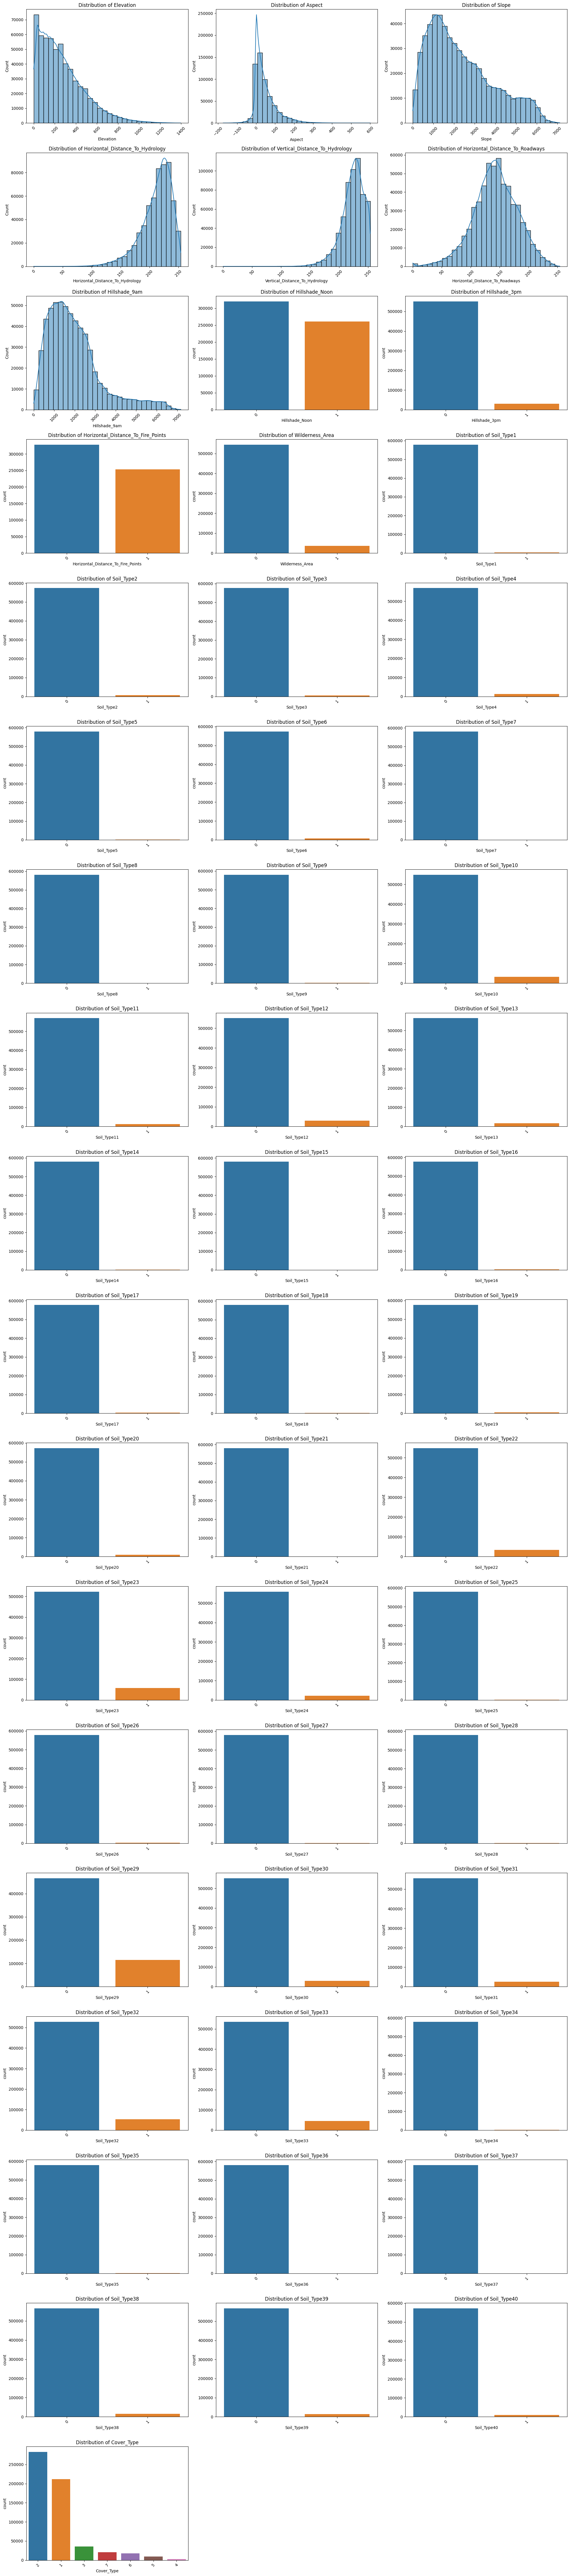

In [8]:
numeric_cols = df.select_dtypes(exclude='object').columns.tolist()

# Limit to 10 features if there are more than 10
# if len(numeric_cols) > 10:
#     numeric_cols = numeric_cols[:10]

# Calculate the number of rows needed (3 plots per row)
n_rows = (len(numeric_cols) + 2) // 3  # Round up division

# Create subplots (3 per row)
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Flatten to 1D array for easier iteration

for i, col in enumerate(numeric_cols):
    if df[col].nunique() < 20:  # Treat as discrete
        sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index[:20])
    else:  # Treat as continuous
        sns.histplot(data=df, x=col, ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots (if total plots not multiple of 3)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

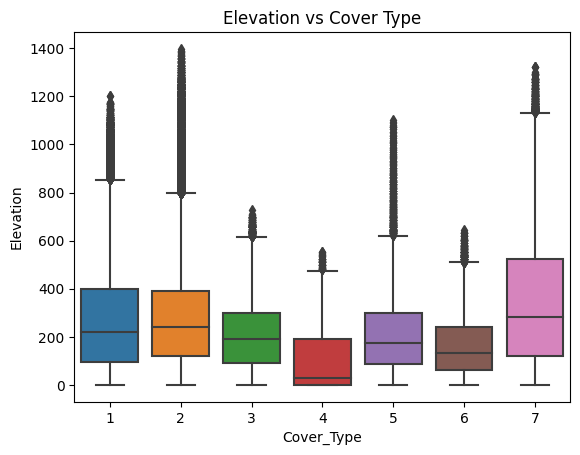

In [9]:
sns.boxplot(x="Cover_Type", y="Elevation", data=df)
plt.title("Elevation vs Cover Type")
plt.show()


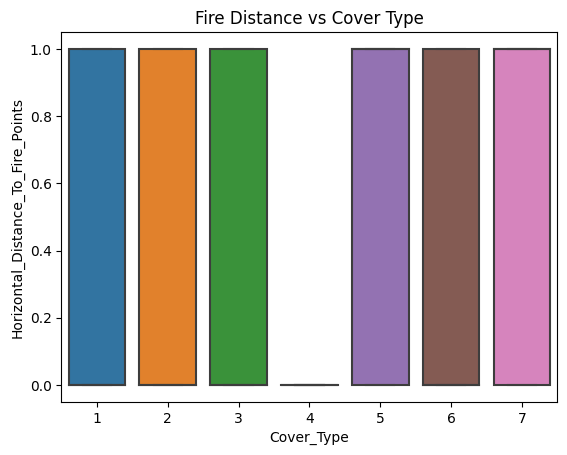

In [10]:
sns.boxplot(x="Cover_Type", y="Horizontal_Distance_To_Fire_Points", data=df)
plt.title("Fire Distance vs Cover Type")
plt.show()


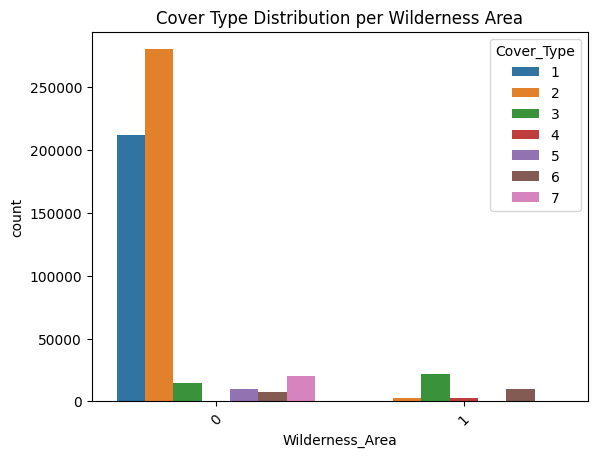

In [11]:
sns.countplot(x="Wilderness_Area", hue="Cover_Type", data=df)
plt.title("Cover Type Distribution per Wilderness Area")
plt.xticks(rotation=45)
plt.show()


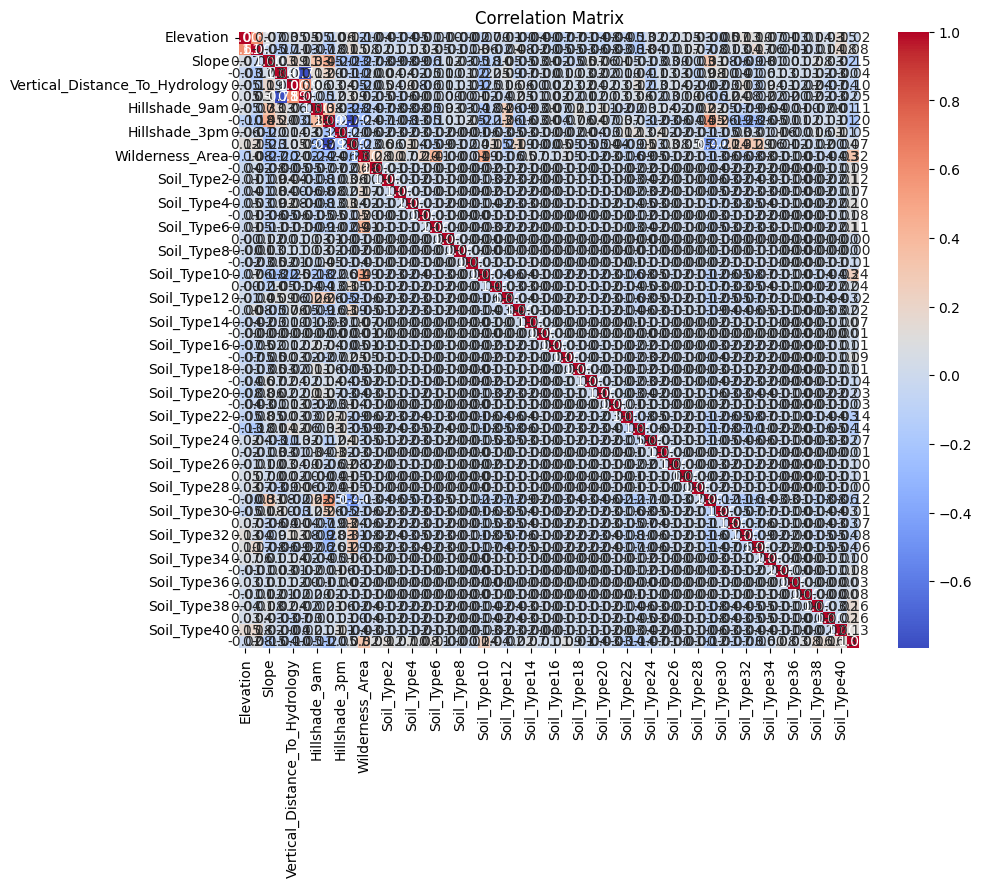

In [12]:

corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [13]:
correlation = df.corr(numeric_only=True)['Cover_Type'].sort_values(ascending=False)
print(correlation)

Cover_Type                            1.000000
Wilderness_Area                       0.323200
Soil_Type10                           0.243876
Soil_Type38                           0.160170
Soil_Type39                           0.155668
Soil_Type40                           0.128351
Soil_Type2                            0.118135
Soil_Type6                            0.112958
Soil_Type4                            0.099672
Soil_Type1                            0.090828
Soil_Type17                           0.090582
Aspect                                0.081664
Soil_Type35                           0.080315
Soil_Type37                           0.080271
Soil_Type5                            0.077890
Soil_Type3                            0.068064
Horizontal_Distance_To_Fire_Points    0.066846
Soil_Type14                           0.065562
Soil_Type11                           0.035379
Soil_Type36                           0.025397
Soil_Type13                           0.024404
Soil_Type16  

## Model

In [14]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
rf = RandomForestClassifier(n_estimators = 200 , random_state = 42 , class_weight = 'balanced')
rf.fit(X_train , y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [17]:
y_pred_rf = rf.predict(X_test)

## Evaluation RF

In [18]:
print(classification_report(y_test , y_pred_rf))

              precision    recall  f1-score   support

           1       0.95      0.92      0.94     42368
           2       0.93      0.96      0.95     56661
           3       0.92      0.94      0.93      7151
           4       0.90      0.80      0.85       549
           5       0.94      0.76      0.84      1899
           6       0.90      0.85      0.88      3473
           7       0.97      0.94      0.95      4102

    accuracy                           0.94    116203
   macro avg       0.93      0.88      0.90    116203
weighted avg       0.94      0.94      0.94    116203



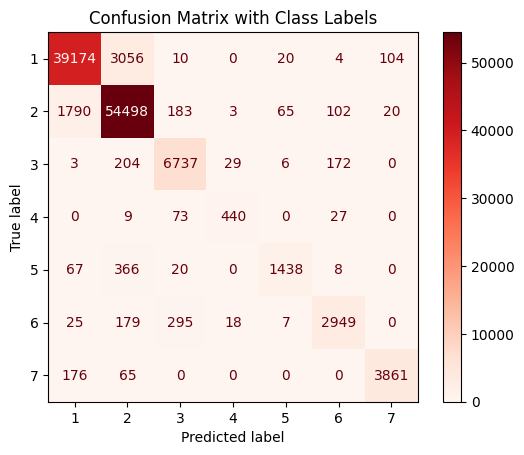

In [19]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=[1, 2, 3, 4, 5, 6, 7])

# Display with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5, 6, 7])
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix with Class Labels")
plt.show()

## ⚠️ Adjusting Labels for XGBoost

XGBoost expects class labels to start from `0`.  
But in our case, `Cover_Type` ranges from `1 to 7`.

So before training, we subtract `1` from the labels to shift them into the `[0–6]` range:



In [20]:
# Shift class labels to start from 0
y_train_adj = y_train - 1
y_test_adj = y_test - 1

## Hyperparameter-tuning

## 🔧 Hyperparameter Tuning for XGBoost using GridSearchCV

We’re tuning the following parameters:

- `n_estimators`: Number of trees (100, 200, 300)
- `max_depth`: Maximum depth of each tree (5, 10)
- `learning_rate`: Step size shrinkage (0.001, 0.005, 0.01, 0.1)

you could try as you want and GridSearchCV choose the best maybe there were another param better than my param so you can try yours 

In [21]:
param_grid_xgb = {
    'n_estimators' : [100,200,300],
    'max_depth' : [5,10],
    'learning_rate': [0.001,0.005,0.01,0.1]
}

grid_search = GridSearchCV(XGBClassifier(random_state = 42), param_grid_xgb , cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train_adj)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Best score:  0.8914457364556193


In [22]:
y_pred_xgb = grid_search.predict(X_test) +1

## Evaluation-XGB

In [23]:
print(classification_report(y_test , y_pred_xgb))

              precision    recall  f1-score   support

           1       0.91      0.85      0.87     42368
           2       0.88      0.93      0.90     56661
           3       0.93      0.93      0.93      7151
           4       0.89      0.85      0.87       549
           5       0.90      0.75      0.82      1899
           6       0.88      0.86      0.87      3473
           7       0.96      0.94      0.95      4102

    accuracy                           0.89    116203
   macro avg       0.90      0.87      0.89    116203
weighted avg       0.89      0.89      0.89    116203



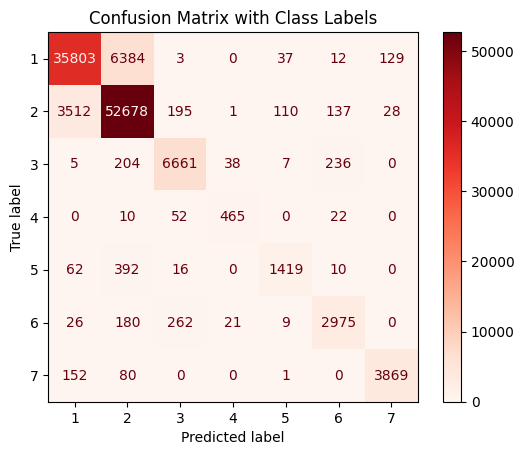

In [24]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb, labels=[1, 2, 3, 4, 5, 6, 7])

# Display with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3, 4, 5, 6, 7])
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix with Class Labels")
plt.show()

## feature-importance

In [25]:
# Get feature importances
rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# Get feature importances
xgb_importances = pd.Series(
    grid_search.best_estimator_.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)


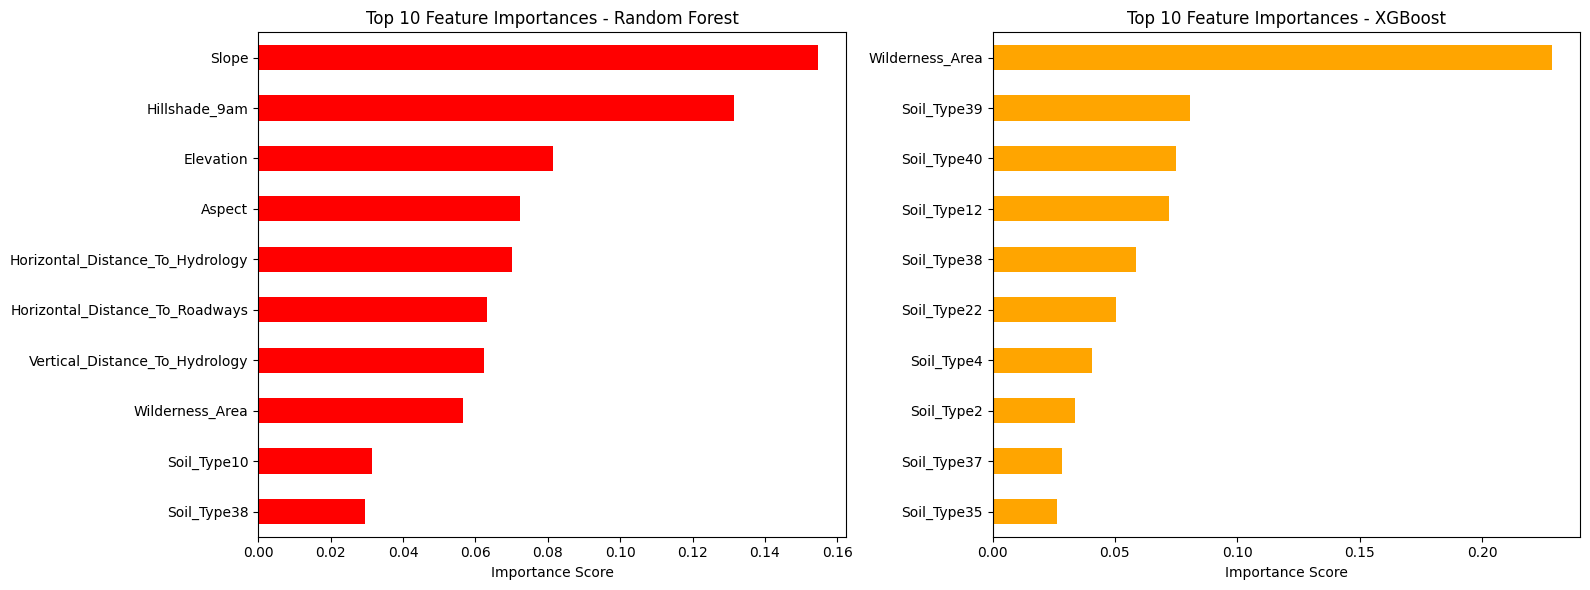

In [26]:
fig , axes = plt.subplots(1,2, figsize = (16,6))

rf_importances.head(10).sort_values().plot(kind = 'barh' , color = 'red' , ax = axes[0])

axes[0].set_title("Top 10 Feature Importances - Random Forest")
axes[0].set_xlabel("Importance Score")

xgb_importances.head(10).sort_values().plot(kind = 'barh' , color = 'orange' , ax = axes[1])
axes[1].set_title("Top 10 Feature Importances - XGBoost")
axes[1].set_xlabel("Importance Score")

plt.tight_layout()
plt.show()

## compare

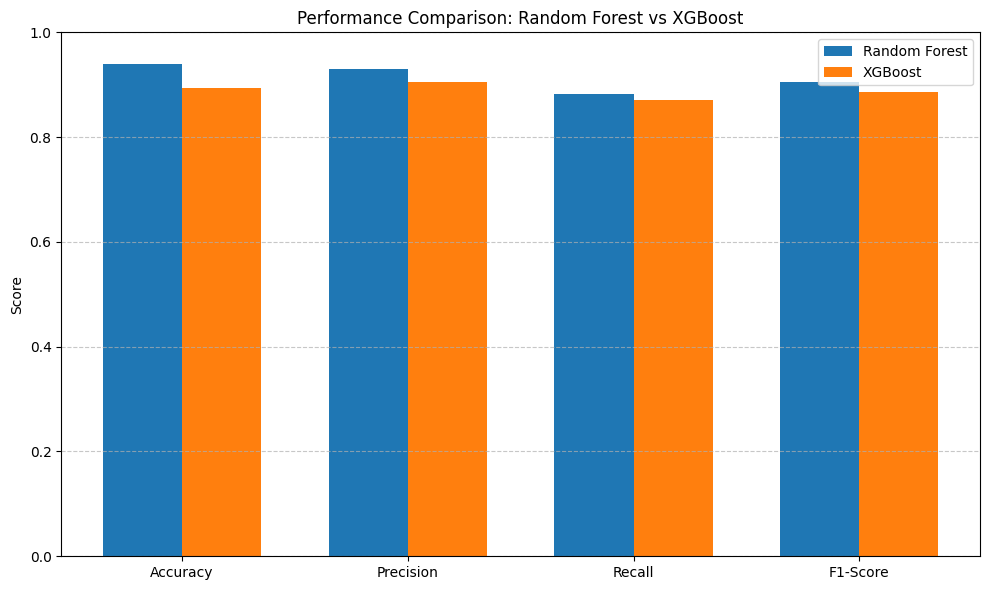

In [27]:
metrics_rf = [
    accuracy_score(y_test, y_pred_rf),
    precision_score(y_test, y_pred_rf, average='macro'),
    recall_score(y_test, y_pred_rf, average='macro'),
    f1_score(y_test, y_pred_rf, average='macro')
]

metrics_xgb = [
    accuracy_score(y_test, y_pred_xgb),
    precision_score(y_test, y_pred_xgb, average='macro'),
    recall_score(y_test, y_pred_xgb, average='macro'),
    f1_score(y_test, y_pred_xgb, average='macro')
]

# Labels
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics_names))  # label locations
width = 0.35  # bar width

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, metrics_rf, width, label='Random Forest')
plt.bar(x + width/2, metrics_xgb, width, label='XGBoost')

# Customize
plt.ylabel('Score')
plt.title('Performance Comparison: Random Forest vs XGBoost')
plt.xticks(x, metrics_names)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


## Notes
In XGBoost, there is no `class_weight` parameter like in Random Forest, but you can extract the class weights and incorporate them into your model. I didn't do this because XGBoost is generally less affected by imbalanced data and often predicts each category well—unlike Random Forest. However, this isn't always the case.  

If you want to extract the weights and apply them to your model, here's how:

```python
classes = np.unique(y_train_adj)  # Extracts all unique class labels from your training target `y_train_adj`.

weights = compute_class_weight('balanced', classes=classes, y=y_train_adj)  # Calculates balanced class weights to handle imbalance.

weight_dict = dict(zip(classes, weights))  # Maps each class label to its computed weight.

sample_weights = np.array([weight_dict[label] for label in y_train_adj])  # Replaces each label with its corresponding weight.

# Apply weights in XGBoost training:
xgb = XGBClassifier(**best_params, random_state=42)
xgb.fit(X_train, y_train_adj, sample_weight=sample_weights)

# Alternatively, if using GridSearchCV:
grid_search.fit(X_train, y_train_adj, sample_weight=sample_weights)